# QUICK SORT IMPLEMENTATION

In [8]:
import random
import time

In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import choice

In [10]:
def insertion_sort(A):
   
    for index in range(1, len(A)):
        i = A[index]
        j = index
       
        while j > 0 and A[j - 1] > i:
            A[j] = A[j -1]
            j = j- 1

        A[j] = i

In [11]:
A = [8, 4, 42, 34, 28, 60, 36, 16, 42, 37, 10]
insertion_sort(A)
print("sorted array: " + str(A))

sorted array: [4, 8, 10, 16, 28, 34, 36, 37, 42, 42, 60]


In [12]:
def merge(L, R):
    i = 0 
    j = 0 
    ret = []
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            ret.append(L[i])
            i += 1
        else:   
            ret.append(R[j])
            j += 1
    while i < len(L):
        ret.append(L[i])
        i += 1
    while j < len(R):
        ret.append(R[j])
        j+= 1
    return ret
        
def mergeSort(A):
    n = len(A)
    if n <= 1:
        return A
    L = mergeSort(A[:round(n/2)])
    R = mergeSort(A[round(n/2):n])
    return merge(L,R)

In [13]:
A = [32,65,34,61,22,78,96,1,48]
print(mergeSort(A))

[1, 22, 32, 34, 48, 61, 65, 78, 96]


In [14]:
# swap A[i] with A[j]
def swap(A, i, j):
    tmp = A[i]
    A[i] = A[j]
    A[j] = tmp

# Here's one in-place Partition algorithm. This is the one in CLRS
def partition1(A, start, end, p):
    # first put the pivot at the end
    x = A[p]
    swap(A, p, end-1)
    # now do the algorithm described in CLRS (see the textbook for explanation)
    i = start - 1
    for j in range(start, end-1):
        if A[j] <= x:
            i += 1
            swap(A, i, j)
    # at this point all of the things <=i are smaller than the pivot, and > i are larger
    # so put the pivot back where it needs to go.
    swap(A, i+1, end-1)
    return i+1


# Here is a different in-place Partition algorithm.  This was the original one introduced by Hoare.
def partition2(A, start, end, p):
    # first swap to put the pivot at the end
    x = A[p]
    swap(A, p, end-1)
    # walk pointers up and down the array in opposite directions, switching things until they are in the right place.
    leftP = start
    rightP = end-1 
    while True:
        while leftP < end-1 and A[leftP] <= x:
            leftP += 1
        while rightP > start and A[rightP] >= x:
            rightP -= 1
        if leftP >= rightP:
            break
        # now switch them.
        swap(A, leftP, rightP)
    # now put the pivot value in the right place and return that location
    swap(A, end-1, leftP)
    return leftP
        
# Finally, the quickSort algorithm.  
# In addition to A, it also takes an optional input "partition" which is which partition function to use.
def quickSort(A, partition=partition1):
    return quickSortHelper(A, 0, len(A), partition)
        
def quickSortHelper(A, start, end, partition):
    if end - start <= 1:
        return 
    # choose a random pivot:
    p = choice(range(start, end)) 
    # partition around the pivot:
    pivotLocation = partition( A, start, end, p ) 
    # recurse:
    quickSortHelper(A,start, pivotLocation ,partition)
    quickSortHelper(A,pivotLocation + 1, end, partition)
    return

# define two versions of quicksort, one for each partition function, so we can compare later.
def quickSort1(A):
    return quickSort(A, partition1)
def quickSort2(A):
    return quickSort(A, partition2)

In [15]:
A = [5,4,2,3,1,1,2,3,4,5,234]
quickSort1(A)
print(A)
quickSort2(A)
print(A)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 234]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 234]


In [16]:
for a in range(1, 8):
    with open(str(10 ** a)+".txt", 'w') as arrFile:
        for j in range(10 ** a):
            arrFile.write(str(random.randint(0, 200))+"\n")


In [35]:
array1 = open("10.txt",'r') 
A = array1. read(). splitlines()
start=time.time()
insertion_sort(A)
final=time.time()  
for item in A:
    f.write(str(item)+" ")       
f.write("\n")
print("Time Taken for Insertion sort:",final-start)
start=time.time()
mergeSort(A)
final=time.time() 
for item in A:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for merge sort:",final-start)
start=time.time()
quickSort1(A)
quickSort2(A)
final=time.time() 
for item in A:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for quick sort:",final-start)


Time Taken for Insertion sort: 0.0
Time Taken for merge sort: 0.0
Time Taken for quick sort: 0.0


In [43]:
array2 = open("100.txt",'r') 
B = array2. read(). splitlines()
start=time.time()
insertion_sort(B)
end=time.time() 
for item in B:
    f.write(item+" ")         
f.write("\n")
print("Time Taken for insertion sort:",end-start)
start=time.time()
mergeSort(B)
end=time.time() 
for item in B:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for merge sort:",end-start)
start=time.time()
quickSort1(B)
quickSort2(B)
end=time.time() 
for item in B:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for quick sort:",end-start)


Time Taken for insertion sort: 0.0
Time Taken for merge sort: 0.0
Time Taken for quick sort: 0.007989883422851562


In [44]:
array3 = open("1000.txt",'r') 
C = array3. read(). splitlines()
start=time.time()
insertion_sort(C)
end=time.time() 
for item in C:
    f.write(item+" ")         
f.write("\n")
print("Time Taken for insertion sort:",end-start)
start=time.time()
mergeSort(C)
end=time.time() 
for item in C:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for merge sort:",end-start)
start=time.time()
quickSort1(C)
quickSort2(C)
end=time.time() 
for item in C:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for quick sort:",end-start)


Time Taken for insertion sort: 0.12412452697753906
Time Taken for merge sort: 0.010055780410766602
Time Taken for quick sort: 0.010042428970336914


In [45]:
array4 = open("10000.txt",'r') 
D = array4. read(). splitlines()
start=time.time()
insertion_sort(D)
end=time.time() 
for item in D:
    f.write(item+" ")         
f.write("\n")
print("Time Taken for insertion sort:",end-start)
start=time.time()
mergeSort(D)
end=time.time() 
for item in D:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for merge sort:",end-start)
start=time.time()
quickSort1(D)
quickSort2(D)
end=time.time() 
for item in D:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for quick sort:",end-start)

Time Taken for insertion sort: 15.529560804367065
Time Taken for merge sort: 0.08614063262939453
Time Taken for quick sort: 0.5642321109771729


In [46]:
array5 = open("100000.txt",'r') 
E = array5. read(). splitlines()    
start=time.time()
insertion_sort(E)
end=time.time() 
for item in E:
    f.write(item+" ")         
f.write("\n")
print("Time Taken for insertion sort:",end-start)
start=time.time()
mergeSort(E)
end=time.time() 
for item in E:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for merge sort:",end-start)
start=time.time()
quickSort1(E)
quickSort2(E)
end=time.time() 
for item in E:
    f.write(item+" ")          
f.write("\n")
print("Time Taken for quick sort:",end-start)

Time Taken for insertion sort: 1788.8714520931244
Time Taken for merge sort: 2.18674635887146
Time Taken for quick sort: 29.014342784881592


## COMPARISON GRAPH

In [25]:
def tryItABunch(myFn, startN=10, endN=100, stepSize=10, numTrials=20, listMax = 10):
    nValues = []
    tValues = []
    for n in range(startN, endN, stepSize):
        runtime = 0
        for t in range(numTrials):
            lst = [ choice(range(listMax)) for i in range(n) ] # generate a random list of length n
            start = time.time()
            myFn( lst )
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

Text(0.5, 1.0, 'Insertion Sort, Merge Sort and Quick Sort')

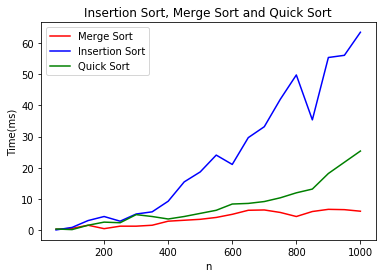

In [28]:
a,b = tryItABunch( mergeSort, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 10)
c,d = tryItABunch(insertion_sort, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 10 )
e,f = tryItABunch( quickSort1, startN = 50, endN = 1050, stepSize=50, numTrials=5, listMax = 10) 

plt.plot(a,b, color="red", label="Merge Sort")
plt.plot(c,d, color="blue", label="Insertion Sort")
plt.plot(e,f, color="green", label="Quick Sort")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Insertion Sort, Merge Sort and Quick Sort")